In [1]:
import sys
sys.path.append('../')
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [3]:
from pydens import add_tokens, Solver, NumpySampler, cart_prod
from utils import plot_loss, plot_pair

## Introductory examples

To begin with, let us go through all of the steps of configuring a `PyDEns`-model using a simple example.

### The easiest example possible: first-order ordinary differential equation in $\mathcal{R}$
$$
\frac{d f}{d t}= 2\pi\cos[2 \pi t]; \quad t \in [0, 1],\ f(0)=1.
$$

The very first thing to do is to add a set of mathematical tokens to the current namespace:

In [4]:
add_tokens()

Configuring `PyDENs`-model comes down to several step:

* setting up dimensionality of the problem:

In [5]:
n_dims = 1

* describing differential form representing the equation using a set of tokens:

In [6]:
form = lambda u, t: D(u, t) - 2 * np.pi * cos(2 * np.pi * t)

* preparing initial/boundary conditions:

In [7]:
initial_condition = 1 # alternatively, can be callable

* choosing point-sampling scheme

In [8]:
s = NumpySampler('uniform')

we can now assemble a `configuration-dict` for the pde-problem

In [9]:
pde = {'n_dims': n_dims,
       'form': form,
       'initial_condition': initial_condition}

* **[optional]** set up a neural network architecture using `layout`-string, that specifies the sequence of layers in a network using letters, like `f`(stands for fully connected) or `a` (stands for activation).

In [10]:
body = {'layout': 'fa fa f',
        'units': [10, 25, 1],
        'activation': [tf.nn.tanh, tf.nn.tanh]}

we are all set to assemble the configuration-dict for the whole model

In [27]:
config = {'body': body,
          'pde': pde}

..and initialize the model-instance

In [38]:
model = Solver(config)

it is not ready yet: we still have to train the model

In [39]:
model.fit(batch_size=150, sampler=s, n_iters=1600, bar='notebook')

check out the loss

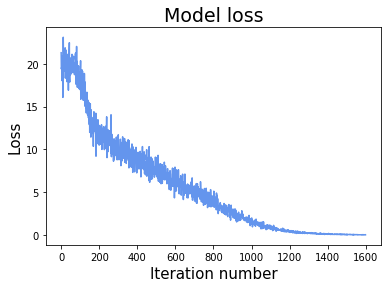

In [40]:
plot_loss(model.loss, color='cornflowerblue')

and the solution along with its network approximation

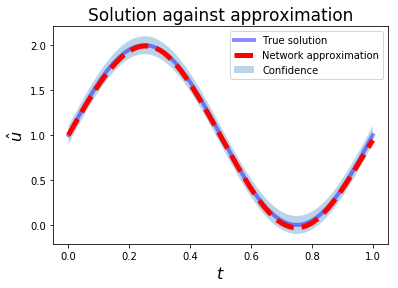

In [85]:
plot_pair(lambda t: np.sin(2*np.pi*t)+1, model, confidence=0.1, alpha=0.3)

### A more interesting one: poisson equation in $\mathcal{R}^2$ with Dirichlet boundary condition

$$\frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = 5\sin[\pi(x + y)];\quad (x, y) \in [0, 1]^2,\ f(0, y)=f(x, 0)=f(1, y)=f(x, 1)=1.
$$

* Task 1: implement [laplace operator](https://en.wikipedia.org/wiki/Laplace_operator)

In [2]:
laplace = lambda u, x, y: '...'

* Task 2: Implement `Sampler` concentrating on the domain-center

In [ ]:
s = NumpySampler('uniform') | NumpySampler('normal', dim=2, scale=0.2) + (0.5, 0.5)

## Getting closer to the inverse problem

### Solving *parametric family* of PDEs

* Task 3: wrap up `e` into `P`-token to introduce a parameter into the equation

### Solving PDEs with *trainable coefficients*

## Solving inverse problems